In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Conv1D,Embedding,GlobalMaxPooling1D, Activation
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import tempfile
model_dir = tempfile.mkdtemp()

C:\Python\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Python\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Python\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Python\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1ty

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('psi_df_2016_2019.csv')

In [4]:
df.head()

,national,south,north,east,central,west,timestamp
0,47,44,37,47,47,34,2016-02-07T18:00:00+08:00
1,59,57,54,59,57,56,2016-02-08T23:00:00+08:00
2,59,57,55,59,57,56,2016-02-09T01:00:00+08:00
3,59,57,55,59,56,56,2016-02-09T02:00:00+08:00
4,59,58,55,59,56,56,2016-02-09T03:00:00+08:00


In [5]:
df = df.drop('timestamp', axis=1)

In [6]:
# Bins data with melt
bins =  [0 ,55 ,150 ,250 ,np.inf]
dfmelt = df.melt()

# 0 --> Normal
# 1 --> Elevated
# 2 --> High
# 3 --> Very high

dfmelt.value = pd.cut(dfmelt.value, bins, labels=[0, 1, 2, 3])

In [7]:
dfmelt.head()

,variable,value
0,national,0
1,national,1
2,national,1
3,national,1
4,national,1


In [8]:
dfmelt[dfmelt['variable'] == 'north'].head()

,variable,value
60044,north,0
60045,north,0
60046,north,0
60047,north,0
60048,north,0


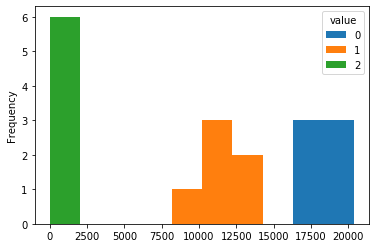

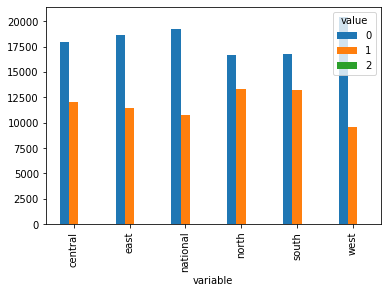

In [9]:
pd.crosstab(dfmelt.variable,dfmelt.value).plot(kind = 'hist')
pd.crosstab(dfmelt.variable,dfmelt.value).plot(kind = 'bar')

In [12]:
frame = [df, dfmelt.value]

In [13]:
#concat 
df_con = pd.concat(frame,axis = 1)

In [14]:
df_con.head()

,national,south,north,east,central,west,value
0,47.0,44.0,37.0,47.0,47.0,34.0,0
1,59.0,57.0,54.0,59.0,57.0,56.0,1
2,59.0,57.0,55.0,59.0,57.0,56.0,1
3,59.0,57.0,55.0,59.0,56.0,56.0,1
4,59.0,58.0,55.0,59.0,56.0,56.0,1


In [15]:
df_con['value'] = df_con['value'].astype(int)

In [16]:
df_con.head()

,national,south,north,east,central,west,value
0,47.0,44.0,37.0,47.0,47.0,34.0,0
1,59.0,57.0,54.0,59.0,57.0,56.0,1
2,59.0,57.0,55.0,59.0,57.0,56.0,1
3,59.0,57.0,55.0,59.0,56.0,56.0,1
4,59.0,58.0,55.0,59.0,56.0,56.0,1


In [17]:
df_con.columns

Index(['national', 'south', 'north', 'east', 'central', 'west', 'value'], dtype='object')

### Normalize Data

In [18]:
cols_to_norm = ['national', 'south', 'north', 'east', 'central', 'west']

In [19]:
df_con[cols_to_norm] = df_con[cols_to_norm].apply(lambda x : (x - x.min()) / (x.max() - x.min() ))

In [20]:
df_con.head()

,national,south,north,east,central,west,value
0,0.261538,0.179104,0.142857,0.282051,0.241135,0.141732,0
1,0.353846,0.276119,0.277778,0.384615,0.312057,0.314961,1
2,0.353846,0.276119,0.285714,0.384615,0.312057,0.314961,1
3,0.353846,0.276119,0.285714,0.384615,0.304965,0.314961,1
4,0.353846,0.283582,0.285714,0.384615,0.304965,0.314961,1


In [21]:
X_data = df_con.drop('value',axis = 1)
labels = df_con['value']

In [22]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, labels, test_size=0.1, random_state=101)

In [23]:
model = Sequential()

In [24]:
model.add(Dense(5, input_dim=6))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [25]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [26]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, verbose=1)


Train on 162118 samples, validate on 18014 samples
Epoch 1/2
162118/162118 [==============================] - 18s 113us/step - loss: 0.2389 - acc: 0.6088 - val_loss: 0.2380 - val_acc: 0.6106
Epoch 2/2
162118/162118 [==============================] - 16s 100us/step - loss: 0.2383 - acc: 0.6088 - val_loss: 0.2380 - val_acc: 0.6106
